# WEEK 6 HW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [2]:
wine =pd.read_csv('Wine.csv',header=None)

In [3]:
wine.columns = ['name'
              ,'alcohol'
              ,'malicAcid'
              ,'ash'
              ,'ashalcalinity'
              ,'magnesium'
              ,'totalPhenols'
              ,'flavanoids'
              ,'nonFlavanoidPhenols'
              ,'proanthocyanins'
              ,'colorIntensity'
              ,'hue'
              ,'od280_od315'
              ,'proline'
                ]

wine.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.describe()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X = wine.iloc[:,1:] 
y = wine.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =7, stratify = y)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
#Standard Scaling

C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=wine.columns[1:])
cov_mat = np.cov(X_train_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals_ = sorted(eig_vals, reverse = True)
eig_vals_

[4.713116224598767,
 2.4957954819978854,
 1.5426476799692155,
 0.982902756340067,
 0.9017149753052198,
 0.6122671516526594,
 0.49200078256693613,
 0.3394855709031514,
 0.29077926800025017,
 0.23851343406462538,
 0.22028374480700538,
 0.17563200872829615,
 0.10055197797648695]

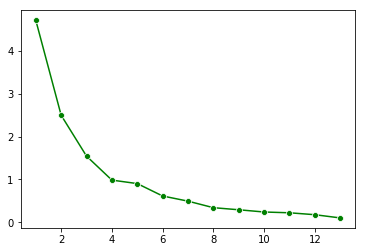

In [8]:
# visualization of eigenvalues
sns.lineplot(x = range(1, 14), y = eig_vals_, color = 'g', marker = 'o')

In [9]:
from sklearn.decomposition import PCA
pca = PCA() 
X_pca = pca.fit_transform(X_train_scaled) 

np.cumsum(pca.explained_variance_ratio_) 

array([0.35962363, 0.55005964, 0.66776787, 0.74276603, 0.81156935,
       0.858287  , 0.895828  , 0.92173168, 0.94391893, 0.96211816,
       0.97892641, 0.99232761, 1.        ])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LR

#Logistic Regression
pca_pipe_1 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_1.fit(X_train, y_train)

print('Logit Train PCA :', pca_pipe_1.score(X_train, y_train))
print('Logit Test PCA :', pca_pipe_1.score(X_test, y_test))

Logit Train PCA : 0.9758064516129032
Logit Test PCA : 0.9259259259259259


C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [11]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_pipe_2 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', LDA())])
pca_pipe_2.fit(X_train, y_train)

print('LDA Train PCA :', pca_pipe_2.score(X_train, y_train))
print('LDA Test PCA :', pca_pipe_2.score(X_test, y_test))

LDA Train PCA : 0.967741935483871
LDA Test PCA : 0.9259259259259259


C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [12]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
pca_pipe_3 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', QDA())])
pca_pipe_3.fit(X_train, y_train)

print('QDA Train PCA :', pca_pipe_3.score(X_train, y_train))
print('QDA Test PCA :', pca_pipe_3.score(X_test, y_test))
#QDA가 제일 높다

C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


QDA Train PCA : 0.9838709677419355
QDA Test PCA : 0.9444444444444444


# FA

In [16]:
from sklearn.decomposition import FactorAnalysis as FA

fa = FA()
X_fa = fa.fit_transform(X)

In [17]:
df_fa = pd.DataFrame(data=X_fa)
df_fa.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.014302,1.635006,-0.972815,-0.188294,0.674808,0.281847,-0.224184,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965034,-0.411003,-1.858834,-0.934911,-0.337345,0.217525,-0.138507,0.0,0.0,0.0,0.0,0.0,0.0
2,1.394755,-0.494738,0.210600,0.644627,0.469704,0.109788,0.125586,0.0,0.0,0.0,0.0,0.0,0.0
3,2.334586,0.015528,0.222738,0.007648,0.941469,0.205388,0.214657,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.036820,1.410068,0.092873,0.744068,0.433513,0.304921,-0.592490,0.0,0.0,0.0,0.0,0.0,0.0


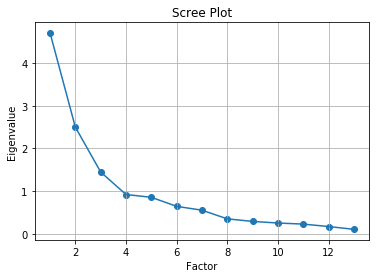

In [22]:
from factor_analyzer import FactorAnalyzer

fa_1 = FactorAnalyzer(rotation='varimax')
fa_1.fit(X)
ev, v = fa_1.get_eigenvalues()
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
# Logistic Regression
pca_pipe_4 = Pipeline([('fa', FA(n_components = 6)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_4.fit(X_train, y_train)
pca_pipe_4.score(X_test, y_test)

print('Logit Train FA :', pca_pipe_4.score(X_train, y_train))
print('Logit Test FA :', pca_pipe_4.score(X_test, y_test))

Logit Train FA : 0.9838709677419355
Logit Test FA : 0.9444444444444444


In [24]:
# LDA
pca_pipe_5 = Pipeline([('fa', FA(n_components = 6)), ('estimator', LDA())])
pca_pipe_5.fit(X_train, y_train)

print('LDA Train FA :', pca_pipe_5.score(X_train, y_train))
print('LDA Test FA :', pca_pipe_5.score(X_test, y_test))

LDA Train FA : 0.9516129032258065
LDA Test FA : 0.9629629629629629


In [25]:
# QDA
pca_pipe_6 = Pipeline([('fa', FA(n_components = 6)), ('estimator', QDA())])
pca_pipe_6.fit(X_train, y_train)

print('QDA Train FA :', pca_pipe_6.score(X_train, y_train))
print('QDA Test FA :', pca_pipe_6.score(X_test, y_test))
#QDA가 제일 좋음

QDA Train FA : 0.9919354838709677
QDA Test FA : 0.9629629629629629


In [27]:
# Logistic Regression w/ Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

pca_pipe_7 = Pipeline([('fa', FA(n_components = 6)), ('poly', PolynomialFeatures(degree = 2)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_7.fit(X_train, y_train)


pca_pipe_8 = Pipeline([('fa', FA(n_components = 6)), ('poly', PolynomialFeatures(degree = 3)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_8.fit(X_train, y_train)

print('Logit Poly2 Train FA :', pca_pipe_7.score(X_train, y_train))
print('Logit Poly2 Test FA :', pca_pipe_7.score(X_test, y_test))

print('Logit Poly3 Train FA :', pca_pipe_8.score(X_train, y_train))
print('Logit Poly3 Test FA :', pca_pipe_8.score(X_test, y_test))
#QDA가 좋은걸로

Logit Poly2 Train FA : 1.0
Logit Poly2 Test FA : 0.9444444444444444
Logit Poly3 Train FA : 1.0
Logit Poly3 Test FA : 0.9629629629629629
